# <font color='red'> Breast Cancer Detection Using Machine Learning Algorithms</font>

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib qt5
%matplotlib inline
import sklearn
import warnings
warnings.filterwarnings('ignore')

# Read Dataset

In [2]:
path = 'D:/tarbiat class/Data mining/project/Breast_cancer_data.csv'
df = pd.read_csv(path)
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


# Initial Data Information

In [3]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [4]:
df.shape

(569, 6)

In [5]:
df.dtypes

mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object

In [6]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      555 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  567 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [8]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,555.000000,569.000000,569.000000,569.000000,567.000000,569.000000
mean,14.164521,19.289649,91.969033,654.889104,0.096312,0.627417
std,3.552541,4.301036,24.298981,351.914129,0.014060,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.710000,16.170000,75.170000,420.300000,0.086210,0.000000
50%,13.400000,18.840000,86.240000,551.100000,0.095860,1.000000
75%,16.050000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [9]:
pd.crosstab(df.mean_radius, df.diagnosis,)  #benign:0 malignant:1

diagnosis,0,1
mean_radius,,
6.981,0,1
7.691,0,1
7.729,0,1
7.760,0,1
8.196,0,1
...,...,...
25.220,1,0
25.730,1,0
27.220,1,0


In [10]:
pd.crosstab(df.mean_texture, df.diagnosis)

diagnosis,0,1
mean_texture,,
9.71,0,1
10.38,1,0
10.72,0,1
10.82,0,1
10.89,0,1
...,...,...
31.12,1,0
32.47,1,0
33.56,1,0


<AxesSubplot:ylabel='diagnosis'>

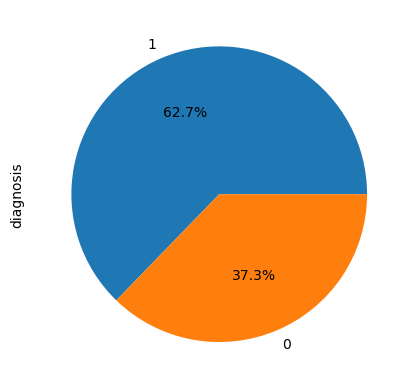

In [11]:
diagnosis=df.diagnosis.value_counts()
diagnosis.plot(kind='pie',autopct="%.1f%%")

# Data Preprocessing

In [12]:
df.isnull()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
564,False,False,False,False,False,False
565,False,False,False,False,False,False
566,False,False,False,False,False,False
567,False,False,False,False,False,False


In [13]:
df.isnull().sum()

mean_radius        14
mean_texture        0
mean_perimeter      0
mean_area           0
mean_smoothness     2
diagnosis           0
dtype: int64

In [14]:
df['mean_radius'].fillna(df['mean_radius'].mean(),inplace=True)
df['mean_smoothness'].fillna(df['mean_smoothness'].mean(),inplace=True)

In [15]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

# Outliers 

In [16]:
def plot_boxplot(df, ft):
    df.boxplot(column = [ft])
    plt.grid(False)
    plt.show()

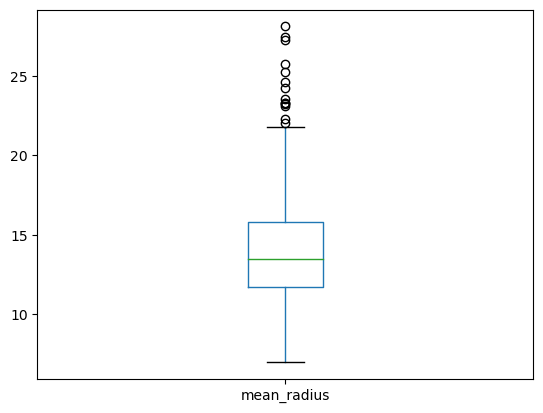

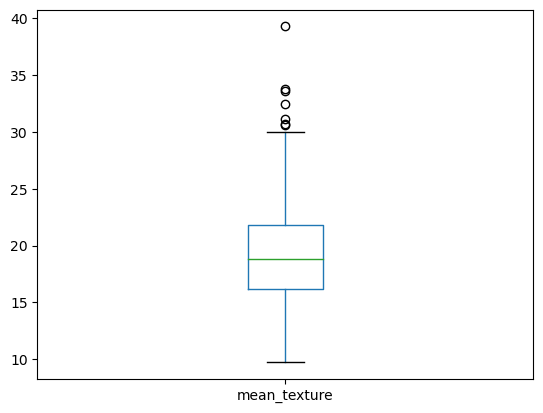

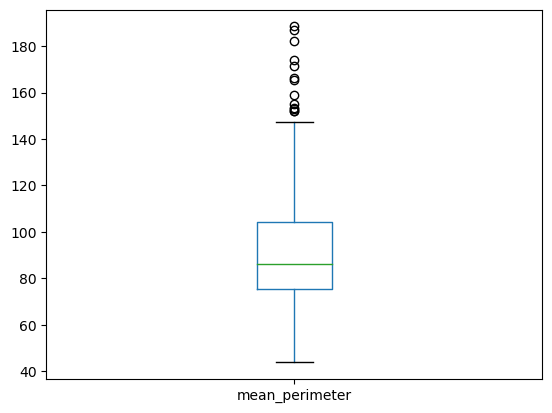

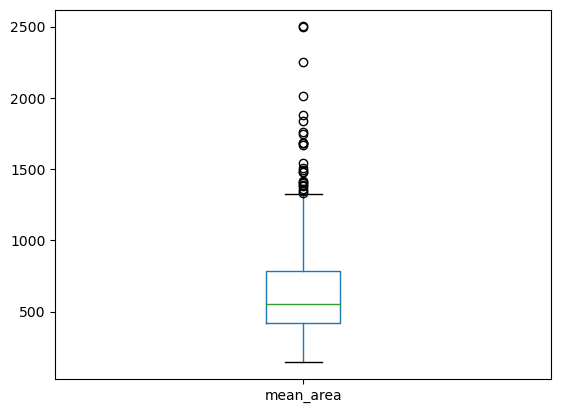

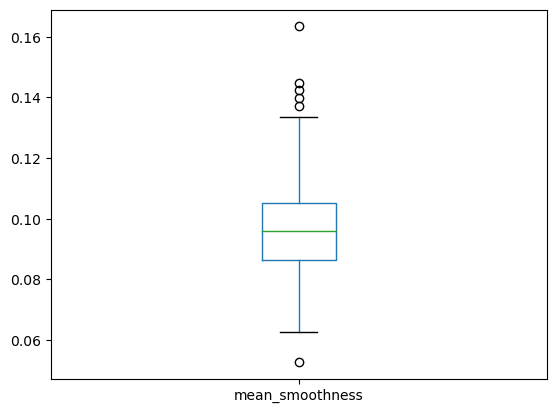

In [17]:
for feature in ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness']:
    plot_boxplot(df , feature)

In [18]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound )]
    
    return ls

In [19]:
index_list = []
for feature in ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness']:
    index_list.extend(outliers(df, feature))

In [20]:
len(index_list) #outliers

65

In [21]:
def remove (df , ls):
    ls = sorted((ls))
    df = df.drop(ls)

    return df

In [22]:
df_cleaned = remove(df, index_list)
df_cleaned.shape

(533, 6)

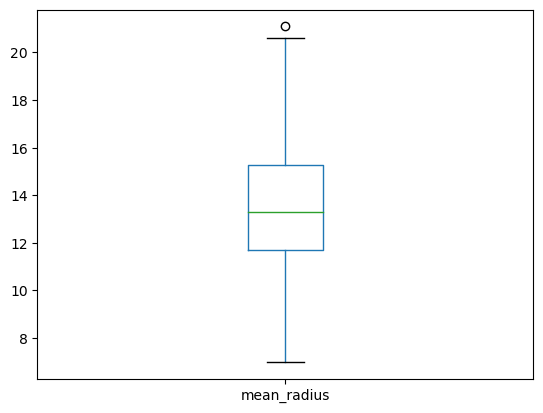

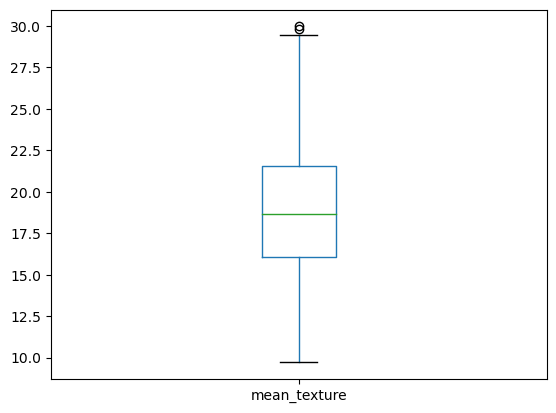

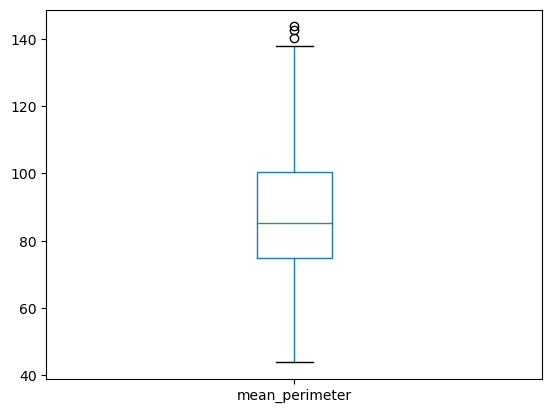

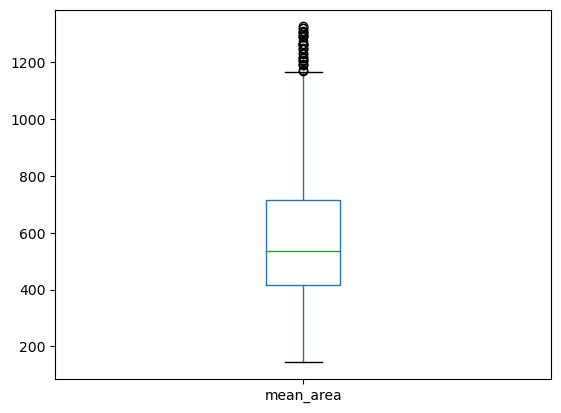

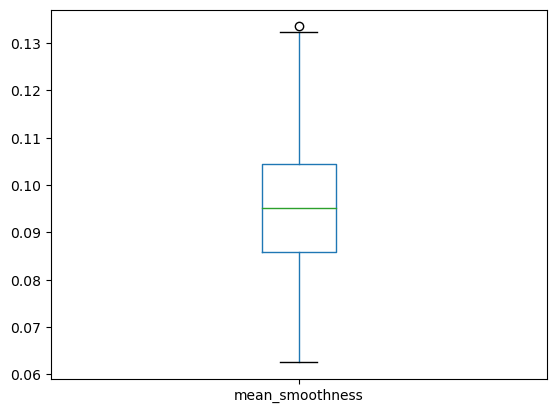

In [23]:
for feature in ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness']:
    plot_boxplot(df_cleaned , feature)

# Normalization

In [24]:
df_cleaned.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0


In [25]:
df_cleaned.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [26]:
x = df_cleaned[['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness']]

In [27]:
y = df_cleaned['diagnosis']

In [28]:
from sklearn import preprocessing

In [29]:
scaler = preprocessing.StandardScaler().fit(x)
x = scaler.transform(x)

In [30]:
print(x)

[[ 1.42708176 -2.15025236  1.6463808   1.43761025  1.7225593 ]
 [ 2.29967526 -0.31093798  2.14118634  2.63018403 -0.82629029]
 [ 2.00204647  0.55520736  1.99911346  2.17884073  1.0561934 ]
 ...
 [ 2.15086087  2.29745373  2.05790224  2.39166928  0.1626573 ]
 [ 0.95696356  2.25514203  0.93601641  0.91324474 -0.84067773]
 [ 2.3098217   2.56625745  2.493919    2.40634711  1.67712526]]


<Axes:>

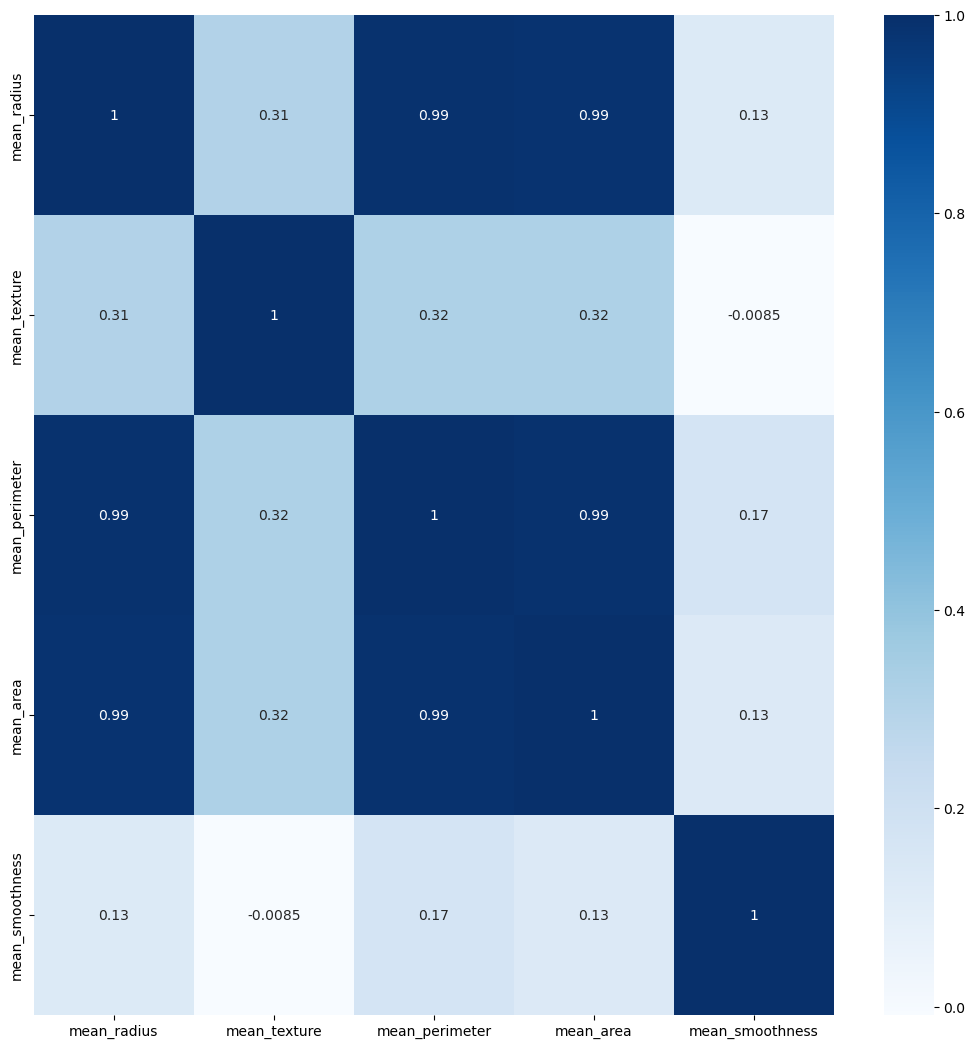

In [31]:
corr = df_cleaned[["mean_radius","mean_texture","mean_perimeter","mean_area","mean_smoothness"]].corr()

fig = plt.figure(figsize=(10,10))
axes = fig.add_axes([0,0,1,1])
sns.heatmap(corr,annot=True,cmap='Blues')

# Splitting

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 5)

In [34]:
print('Train set: ',x_train.shape, y_train.shape)
print('Test set: ',x_test.shape, y_test.shape)

Train set:  (373, 5) (373,)
Test set:  (160, 5) (160,)


# Classification Models

# KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression

In [36]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

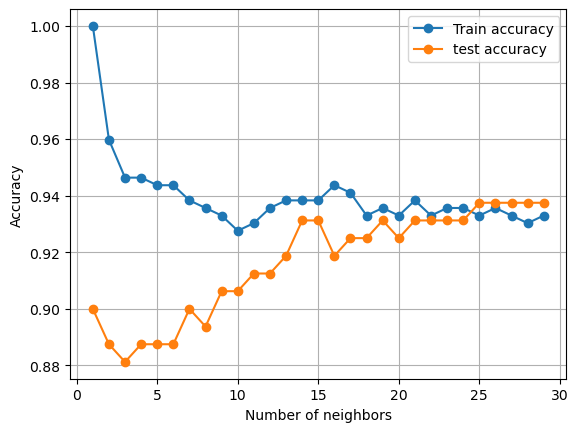

In [37]:
from sklearn.neighbors import KNeighborsClassifier
neighbors= np.arange(1,30)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train, y_train)
    train_accuracy[i]=knn_model.score(x_train, y_train)
    test_accuracy[i]=knn_model.score(x_test, y_test)  
    
plt.plot(neighbors, train_accuracy, label='Train accuracy', marker='o')
plt.plot(neighbors, test_accuracy, label='test accuracy', marker='o')  
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [38]:
from sklearn import metrics
print("Train Score: ", knn.score(x_train, y_train))
print("Test Score: ", knn.score(x_test, y_test))

Train Score:  0.9436997319034852
Test Score:  0.8875


Text(0, 0.5, ' Error rate ')

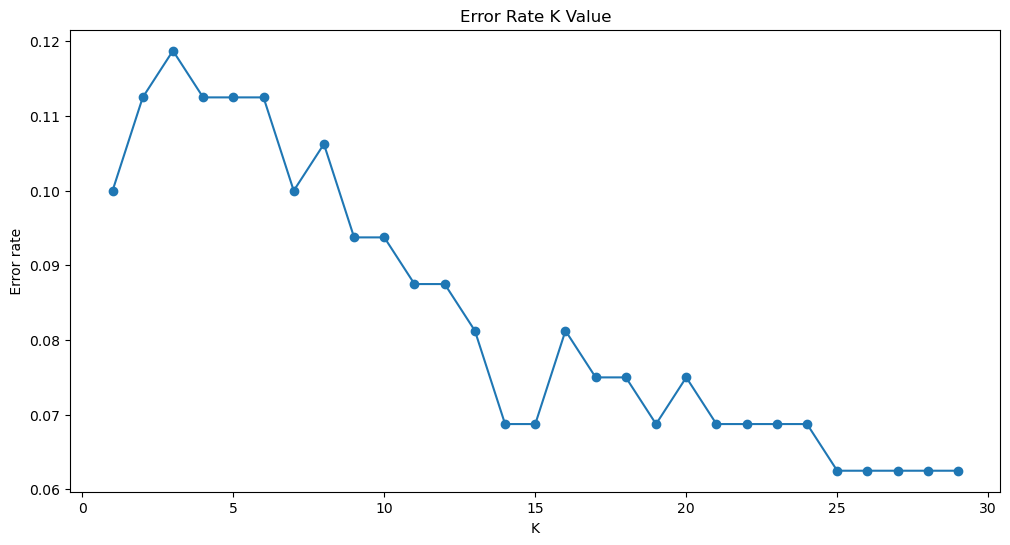

In [39]:
error = []

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, marker='o')
plt.title('Error Rate K Value')
plt.xlabel('K')
plt.ylabel(' Error rate ')

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        56
           1       0.92      0.90      0.91       104

    accuracy                           0.89       160
   macro avg       0.87      0.88      0.88       160
weighted avg       0.89      0.89      0.89       160



Text(0.5, 23.52222222222222, 'Predicted')

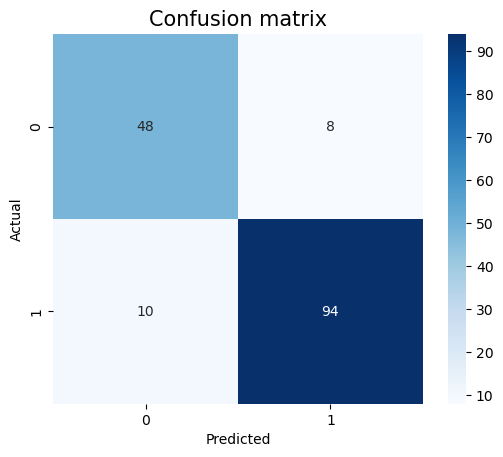

In [41]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, square = True , annot = True,cmap='Blues')
plt.title('Confusion matrix', size = 15)
plt.ylabel('Actual', size = 10)
plt.xlabel('Predicted', size = 10)

# Grid Search for KNN

In [42]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors': list (range(3,7)) , 'metric': ['manhattan','euclidean']}

grid_search = GridSearchCV(estimator = knn,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose = 3)

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ...metric=manhattan, n_neighbors=3;, score=0.947 total time=   0.0s
[CV 2/5] END ...metric=manhattan, n_neighbors=3;, score=0.893 total time=   0.0s
[CV 3/5] END ...metric=manhattan, n_neighbors=3;, score=0.920 total time=   0.0s
[CV 4/5] END ...metric=manhattan, n_neighbors=3;, score=0.946 total time=   0.0s
[CV 5/5] END ...metric=manhattan, n_neighbors=3;, score=0.892 total time=   0.0s
[CV 1/5] END ...metric=manhattan, n_neighbors=4;, score=0.947 total time=   0.0s
[CV 2/5] END ...metric=manhattan, n_neighbors=4;, score=0.893 total time=   0.0s
[CV 3/5] END ...metric=manhattan, n_neighbors=4;, score=0.920 total time=   0.0s
[CV 4/5] END ...metric=manhattan, n_neighbors=4;, score=0.946 total time=   0.0s
[CV 5/5] END ...metric=manhattan, n_neighbors=4;, score=0.892 total time=   0.0s
[CV 1/5] END ...metric=manhattan, n_neighbors=5;, score=0.933 total time=   0.0s
[CV 2/5] END ...metric=manhattan, n_neighbors=5;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'metric': ['manhattan', 'euclidean'],
                         'n_neighbors': [3, 4, 5, 6]},
             scoring='accuracy', verbose=3)

In [43]:
grid_search.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

In [44]:
grid_search.best_score_

0.924936936936937

# ROC for KNN

In [45]:
model = KNeighborsClassifier(n_neighbors=5 , metric='euclidean')
model.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [46]:
pred_prob = model.predict_proba(x_test)
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
auc_score = roc_auc_score(y_test, pred_prob[:,1])
print(auc_score)

0.9314903846153847


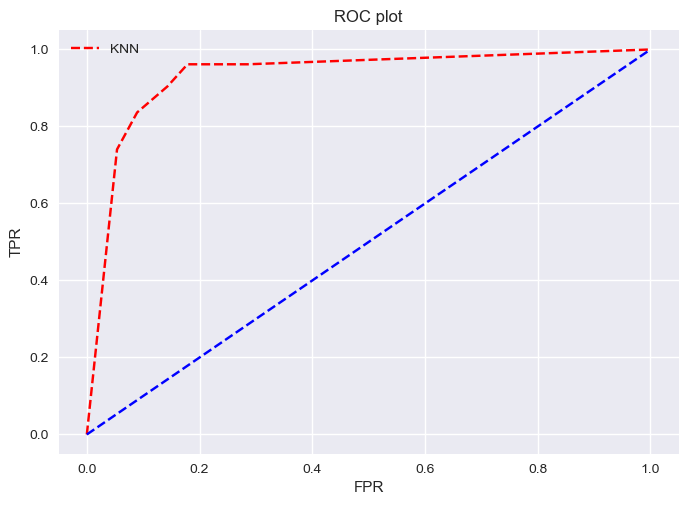

In [47]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.plot(fpr, tpr, linestyle='--',color='red', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

# Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Grid Search for Decision Tree

In [49]:
DT = DecisionTreeClassifier() 
DT.fit(x_train, y_train)
pred = DT.predict(x_test) 

In [50]:
DT = DecisionTreeClassifier( )

param = {'criterion':['gini', 'entropy'] ,
         'max_depth':[3,4,5] ,
         'min_samples_split':[3,4,5,6] ,
         'min_samples_leaf':[2,3,4]}

GS = GridSearchCV(DT, param ,cv = 5)

GS.fit(x, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [3, 4, 5, 6]})

In [51]:
GS.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 4}

In [52]:
GS.best_score_

0.9137012872509258

In [53]:
DT = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5,min_samples_leaf = 2,min_samples_split= 4)

DT.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=4)

In [54]:
pred = DT.predict(x_test) 

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        56
           1       0.94      0.90      0.92       104

    accuracy                           0.90       160
   macro avg       0.89      0.90      0.89       160
weighted avg       0.90      0.90      0.90       160



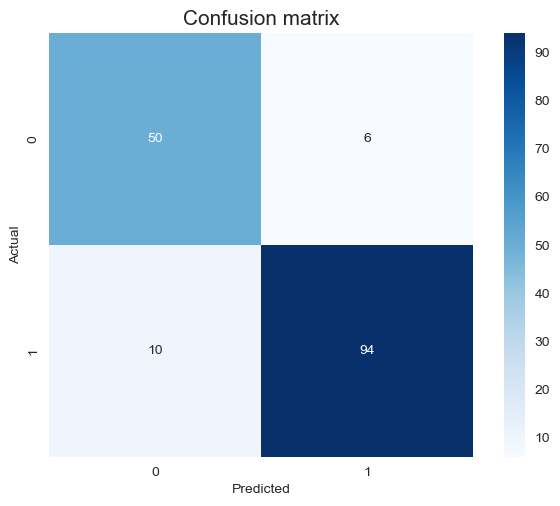

In [55]:
matrix = confusion_matrix(y_test, pred)
sns.heatmap(matrix, square = True , annot = True,cmap='Blues')
plt.title('Confusion matrix', size = 15)
plt.ylabel('Actual', size = 10)
plt.xlabel('Predicted', size = 10)
print(classification_report(y_test, pred))

[Text(0.6298076923076923, 0.9166666666666666, 'X[2] <= 0.468\nentropy = 0.92\nsamples = 373\nvalue = [125, 248]'),
 Text(0.33653846153846156, 0.75, 'X[1] <= 0.148\nentropy = 0.554\nsamples = 280\nvalue = [36, 244]'),
 Text(0.15384615384615385, 0.5833333333333334, 'X[4] <= 1.041\nentropy = 0.203\nsamples = 189\nvalue = [6, 183]'),
 Text(0.07692307692307693, 0.4166666666666667, 'X[2] <= 0.07\nentropy = 0.052\nsamples = 170\nvalue = [1, 169]'),
 Text(0.038461538461538464, 0.25, 'entropy = 0.0\nsamples = 154\nvalue = [0, 154]'),
 Text(0.11538461538461539, 0.25, 'X[2] <= 0.131\nentropy = 0.337\nsamples = 16\nvalue = [1, 15]'),
 Text(0.07692307692307693, 0.08333333333333333, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.15384615384615385, 0.08333333333333333, 'entropy = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.23076923076923078, 0.4166666666666667, 'X[2] <= -0.554\nentropy = 0.831\nsamples = 19\nvalue = [5, 14]'),
 Text(0.19230769230769232, 0.25, 'entropy = 0.0\nsamples = 11\nv

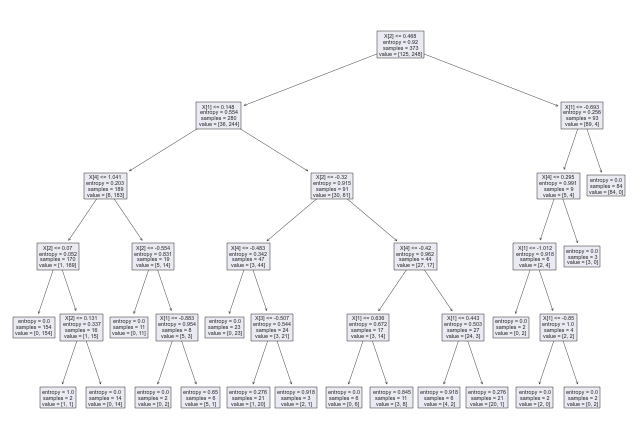

In [56]:
tree.plot_tree(DT)

# ROC for Decision Tree

In [57]:
model2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5,min_samples_leaf = 2,min_samples_split= 4)
model2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=4)

In [58]:
pred_prob2 = model2.predict_proba(x_test)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
random_probs2 = [0 for i in range(len(y_test))]
p_fpr2, p_tpr2, _2 = roc_curve(y_test, random_probs2, pos_label=1)
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
print('auc score:',auc_score2)

auc score: 0.918011675824176


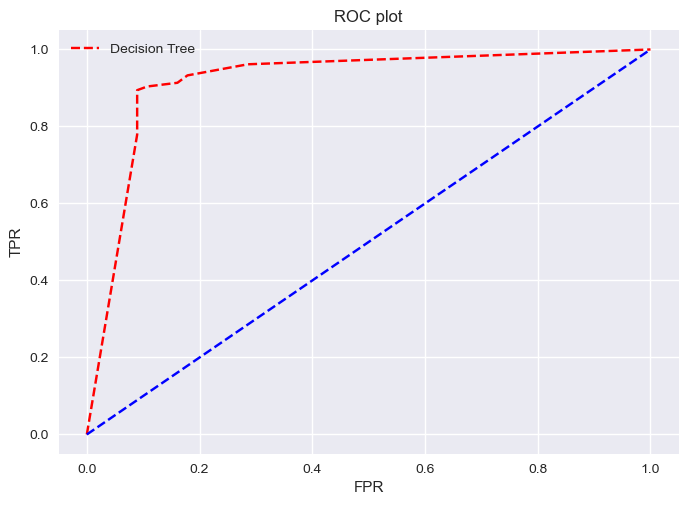

In [59]:
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Decision Tree')
plt.plot(p_fpr2, p_tpr2, linestyle='--', color='blue')

plt.title('ROC plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

# SVM

In [60]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [61]:
svm = SVC(kernel = 'linear')
svm.fit(x_train, y_train)
pred_svm = svm.predict(x_test)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        56
           1       0.95      0.96      0.96       104

    accuracy                           0.94       160
   macro avg       0.94      0.94      0.94       160
weighted avg       0.94      0.94      0.94       160



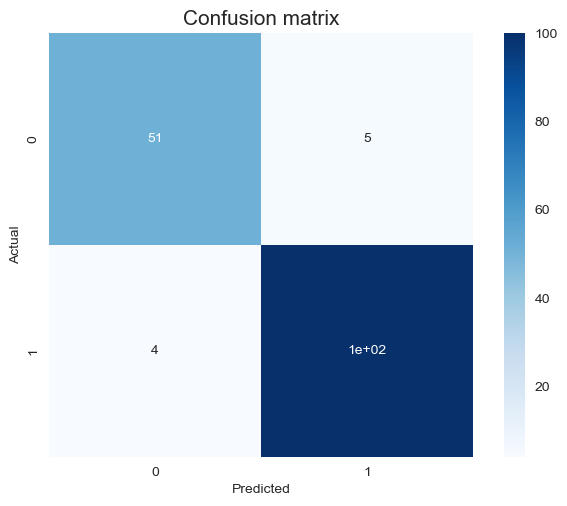

In [62]:
matrix = confusion_matrix(y_test, pred_svm)
sns.heatmap(matrix, square = True , annot = True,cmap='Blues')
plt.title('Confusion matrix', size = 15)
plt.ylabel('Actual', size = 10)
plt.xlabel('Predicted', size = 10)
print(classification_report(y_test, pred_svm))

# Grid Search for SVM

In [63]:
from sklearn.model_selection import GridSearchCV

param_dist = {
    
    'kernel':['linear','rbf','sigmoid'],
    'C':[0.1,1,10,100],
    'gamma' : [0.1,1,10,100]

}

clf = GridSearchCV(SVC(),param_dist,cv = 5)

gs = clf.fit(x_train,y_train)
gs_pred = clf.predict(x_test)

In [64]:
print(gs.best_score_)

0.9276036036036036


In [65]:
print(gs.best_params_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [66]:
print(accuracy_score(y_test,gs_pred))

0.90625


# ROC for SVM

In [67]:
model3 = SVC( C= 10 , gamma= 0.1 ,kernel = "linear", probability=True)

In [68]:
model3.fit(x_train, y_train)
pred_prob3 = model3.predict_proba(x_test)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
random_probs3 = [0 for i in range(len(y_test))]
p_fpr3, p_tpr3, _3 = roc_curve(y_test, random_probs3, pos_label=1)
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
print(auc_score3)

0.9720123626373627


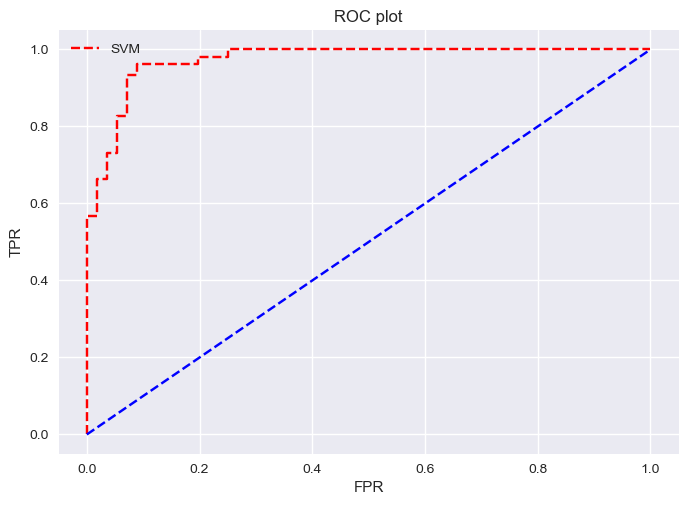

In [69]:
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='SVM')
plt.plot(p_fpr3, p_tpr3, linestyle='--', color='blue')

plt.title('ROC plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

# Ensemble Learning Models

# Boosting

In [70]:
from sklearn.ensemble import AdaBoostClassifier

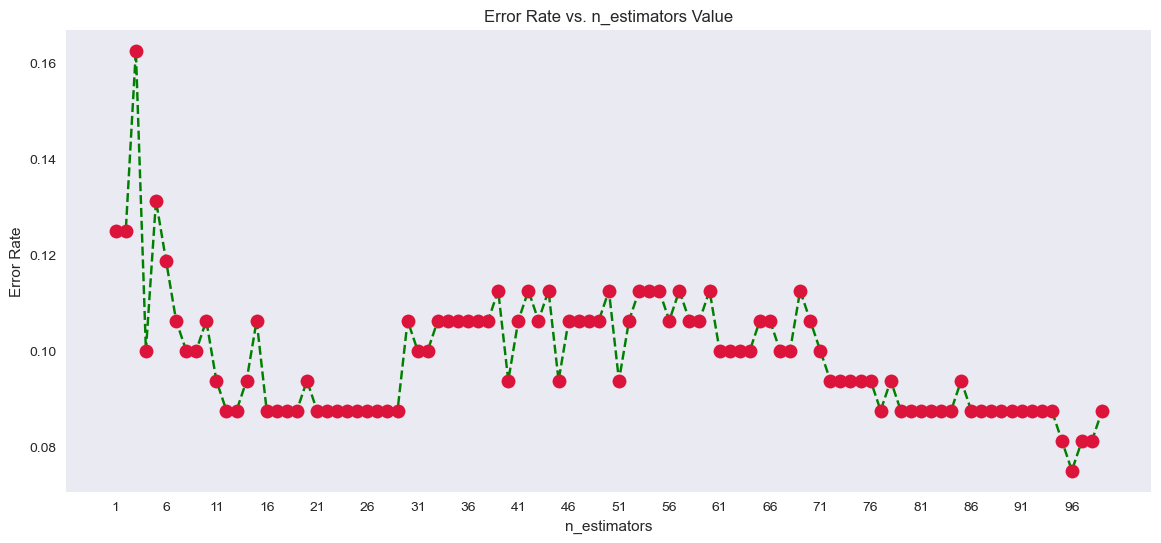

In [77]:
error_rate=[]
for i in range(1,100):
        iteration_error=[]
        boost= AdaBoostClassifier(n_estimators=i,learning_rate=1)
        boost.fit(x_train,y_train)
        pred_i = boost.predict(x_test)
        iteration_error.append(np.mean(pred_i != y_test))
        error_rate.append(np.mean(iteration_error))
        
plt.figure(figsize=(14,6))
plt.plot(range(1,100),error_rate,color='green', linestyle='dashed', marker='o',markerfacecolor='crimson', markersize=10)
plt.title('Error Rate vs. n_estimators Value')
plt.xlabel('n_estimators')
plt.ylabel('Error Rate')
plt.xticks([j for j in range(1,101,5)])
plt.grid()
plt.show()

Test Accuracy is : 0.89375
[[51  5]
 [12 92]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        56
           1       0.95      0.88      0.92       104

    accuracy                           0.89       160
   macro avg       0.88      0.90      0.89       160
weighted avg       0.90      0.89      0.90       160

random pred is  0.5
dt test auc 0.971668956043956


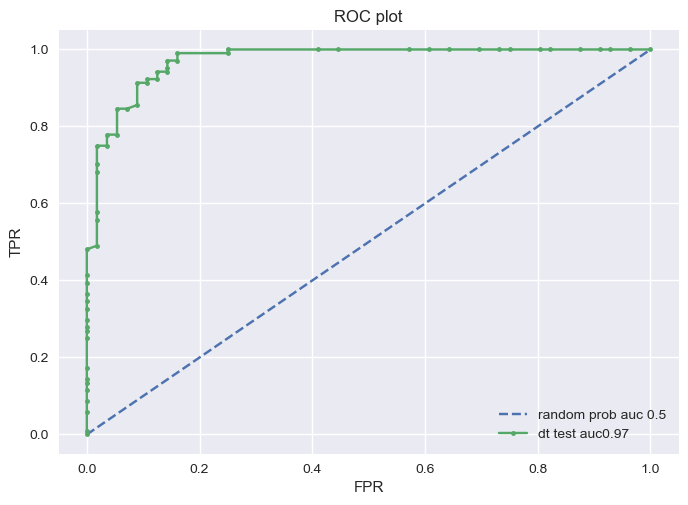

In [79]:
boost=AdaBoostClassifier(n_estimators=65,learning_rate=1)
boost.fit(x_train, y_train)
boost_pred = boost.predict(x_test)
acc = accuracy_score(y_test, boost_pred)


print("Test Accuracy is :", acc)
print(confusion_matrix(y_test,boost_pred))
print(classification_report(y_test,boost_pred))


#Roc curve
r_probs = [0 for i in range(len(y_test))]
boost_prob_test = boost.predict_proba(x_test)


boost_prob_test = boost_prob_test[:,1]



r_auc = roc_auc_score(y_test,r_probs)
boost_auc_test = roc_auc_score(y_test,boost_prob_test)


print('random pred is ',r_auc)
print('dt test auc',boost_auc_test)



#step 2 

r_fpr,r_tpr,i = roc_curve(y_test,r_probs)
r_fpr1,r_tpr1,i = roc_curve(y_test,boost_prob_test)



# step 3 

plt.plot(r_fpr,r_tpr,label = f"random prob auc {r_auc}",linestyle = '--')
plt.plot(r_fpr1,r_tpr1,label = f'dt test auc{round(boost_auc_test,2)}',marker = '.')


plt.title('ROC plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()


# Bagging

In [80]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score

 Cross Validation

In [82]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

In [83]:
bgclass = BaggingClassifier(base_estimator=SVC(kernel='linear',C = 1),random_state=42)
scores = cross_val_score(bgclass,x_train,y_train,cv = kf ,scoring='accuracy')

bgclass.fit(x_train,y_train)
bgclass.predict(x_test)

print("Mean accuracy: ", scores.mean())


Mean accuracy:  0.9114954954954955


# Bagging with SVM

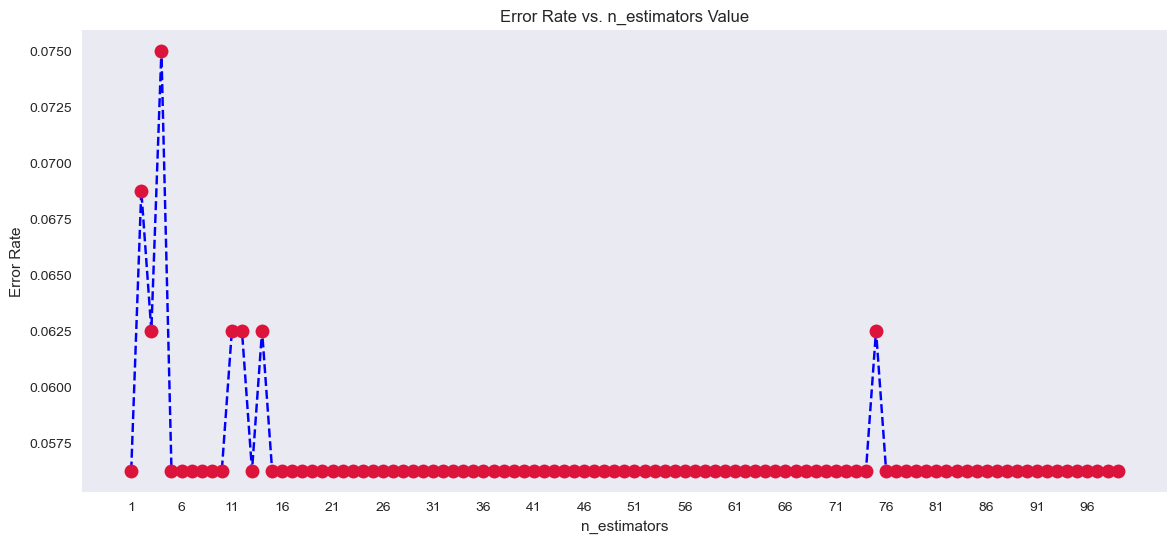

In [88]:
error_rate=[]
for i in range(1,100):
        iteration_error=[]
        bag = BaggingClassifier(base_estimator=SVC(kernel="linear"),n_estimators=i)
        bag.fit(x_train,y_train)
        pred_i = bag.predict(x_test)
        iteration_error.append(np.mean(pred_i != y_test))
        error_rate.append(np.mean(iteration_error))
plt.figure(figsize=(14,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='crimson', markersize=10)
plt.title('Error Rate vs. n_estimators Value')
plt.xlabel('n_estimators')
plt.ylabel('Error Rate')
plt.xticks([j for j in range(1,101,5)])
plt.grid()
plt.show()

In [96]:
bag=BaggingClassifier(base_estimator=SVC(kernel="linear"),n_estimators=5)
bag.fit(x_train, y_train)
bag_pred = bag.predict(x_test)
acc = accuracy_score(y_test, bag_pred)


print(" Test Accuracy is :", acc)

print(confusion_matrix(y_test,bag_pred))
print(classification_report(y_test,bag_pred))

 Test Accuracy is : 0.94375
[[ 51   5]
 [  4 100]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        56
           1       0.95      0.96      0.96       104

    accuracy                           0.94       160
   macro avg       0.94      0.94      0.94       160
weighted avg       0.94      0.94      0.94       160



# Random forest

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        56
           1       0.90      0.96      0.93       104

    accuracy                           0.91       160
   macro avg       0.91      0.88      0.89       160
weighted avg       0.91      0.91      0.90       160



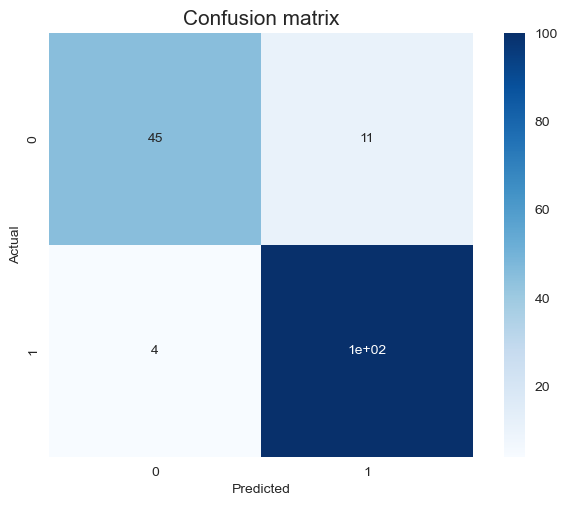

In [102]:
RF = RandomForestClassifier(n_estimators=9,criterion='gini',max_depth=3)
RF.fit(x_train,y_train) 
pred_ii = RF.predict(x_test)
matrix = confusion_matrix(y_test, pred_ii)
sns.heatmap(matrix, square = True , annot = True,cmap='Blues')
plt.title('Confusion matrix', size = 15)
plt.ylabel('Actual', size = 10)
plt.xlabel('Predicted', size = 10)
print(classification_report(y_test, pred_ii))

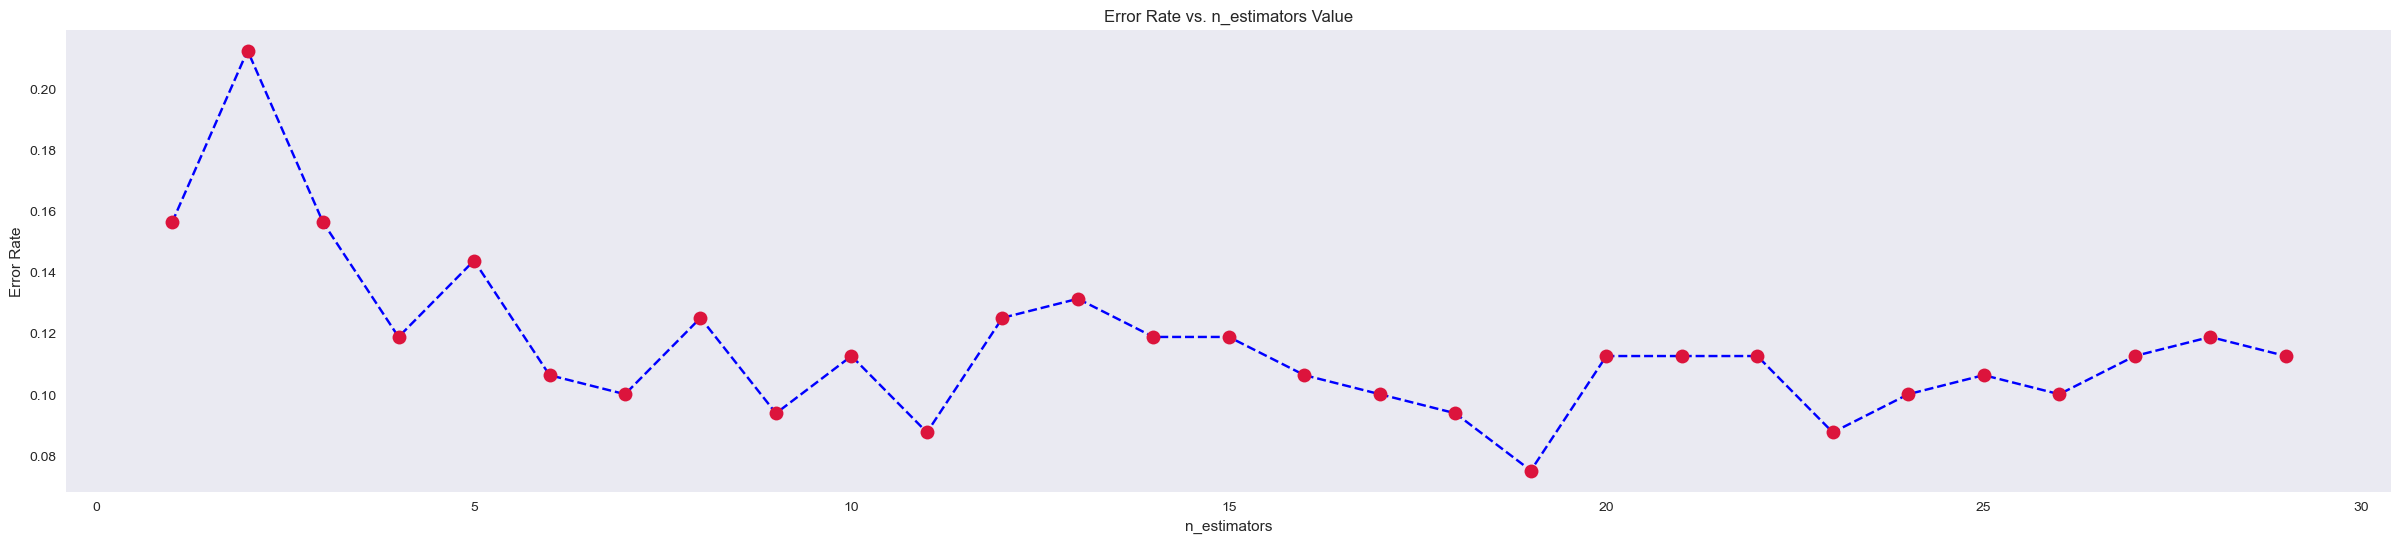

In [99]:
error_rate=[]
for i in range(1,30):
        iteration_error=[]
        RF = RandomForestClassifier(n_estimators=i)
        RF.fit(x_train,y_train)
        pred_i = RF.predict(x_test)
        iteration_error.append(np.mean(pred_i != y_test))
        error_rate.append(np.mean(iteration_error))
plt.figure(figsize=(30,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='crimson', markersize=10)
plt.title('Error Rate vs. n_estimators Value')
plt.xlabel('n_estimators')
plt.ylabel('Error Rate')
plt.grid()
plt.show()